# Microbial Metabolism Analysis

<hr>

## Introduction
<hr>

$\color{darkblue}{\textbf{learning outcome}}$
- remember commands from previous notebooks and apply them
- apply information from the code in metabolic maps and vice versa
- compare and evaluate metabolic pathway databases
<hr>

Genome Scale Metabolic Models (GSMMs) contain all metabolic information of a biological system and break them down into a mathematical model. This allows in-depth insight into molecular mechanisms of organisms and enables the analysis of metabolic pathways, because it breaks them down into their respective reactions and enzymes.\
Metabolites running in the, for instance, Glycolysis or TCA-Cycle are utilized in this Notebook to simulate the *E. coli* metabolism.

$\color{darkblue}{\text{Glycolysis:}}$\
Glycolysis is one component of the central metabolism and is an amphibolic pathway (involves both anabomlism and catabolism) because it can reversibly produce hexoses from varius low-molecular weight molecules. It produces six precursor metabolites that are starting materials for the biosynthesis of building blocks for macromolecules and other needed small molecules. Therefore its functioning under all conditions is essential.\

$\color{darkblue}{\text{TCA-Cycle:}}$\
The TCA-Cycle is another component of the central metabolism and is a catabolic pathway of aerobic respiration. It generates energy (ATP) and also precursors for biosynthesis.

You are provided with an overview of the *E. coli* core metabolism. It is now clear that the metabolism not only consists of the glycolysis and TCA-Cycle. A lot of metabolic byproducts take place in the energy managment of the cell and even reactions of fermentation could be part of the pathway.

<div style="width: 500px; margin: auto;">

![Feedforward loop classes](../52_Results/Eco_core_met.png)

</div>

The model makes metabolic pathway analysis easy, because is breaks down the pathways into their respective reactions and enzymes.
The *E. coli* core model contains only 137 genes, 95 reactions and 72 metabolites, what makes working with this model easier and more time efficient. 
The related flux balance analysis seeks to mathematically simulate metabolism in genome-scale reconstructions of metabolic network.  

**Comparing database maps:**
- $\color{darkblue}{\text{KEGG:}}$ Kyoto Encyclopedia of Genes and Genomes (KEGG) is a bioinformatics database containing information about genes, proteins, reactions and pathways. With the 'KEGG Pathway' option it is possible to find pathway maps in which the metabolite ID can be searched and is afterwards highlighted in the map.
- $\color{darkblue}{\text{BioCyc/EcoCyc:}}$ A collection of pathway/genome databases for model organisms and contains software tools to explore them. The 'Metabolic Map' option makes finding metabolic pathways easy and time efficient by typing in the 'map-name'.
- $\color{darkblue}{\text{BiGG:}}$ A bioinformatics database that utilizes the ESCHER map. This map visualizes metabolic pathways like Glycolysis and TCA-Cycle and provides information about metabolites and reactions. It dispalys different metabolic processes in one map, for instance, Glycolysis, TCA-Cycle, and electron transport chain.
- $\color{darkblue}{\text{ChatGPT:}}$ Chat-AI that answers questions about any topic. It is not possible to create a map or any other form of visualization which gives less overview of the metabolic reactions. 

Database| Enzymes| Genes| Reactions| Pathways| Metabolites
:-------:|:-------:|:-------:|:-------:|:-------:|:-------:
KEGG       | X | - | X | XX | XXX |
BioCyc/EcoCyc | XX | XX | XX | XX | XX |
BiGG/ESCHER| - | - | XX | XXX | XX |
ChatGPT    | X | - | X | - | X |
  
<hr>

Set up the computational environment by running this cell.\
Make sure all neccessary files (EcoMetSim_functions, images) are loaded.

In [4]:
# install requirements
# %pip install -r ../requirements.txt

In [5]:
# this code-cell sets up the computational environment for the notebook

# file system and path operations
# import os
import numpy as np
import random
from random import *
# import matplotlib.pyplot as plt

# load cobra toolbox and install it if necessary
from cobra.io import read_sbml_model
print('Cobra toolbox is already installed')

# load functions from the EcoMetSim toolbox
from MetEngSim_functions import *

print('Done')

Cobra toolbox is already installed
Done


## set up model
In this cell you generate your individual pair of two metabolites that will operate as substrate and product.\
The Output displays the metabolite ID, the maximal possible product rate and the currently generated product rate.

**Input:**
- your student ID

Replace None with the correct input.

In [6]:
Student_ID = 431540
model, selected_pair, all_reactions, product, product_lim, _ = make_metabolite_combination(Student_ID)
print(selected_pair, product_lim)

Loading existing file e_coli_core.xml.gz
['fum_e', 'ac_e'] [0.5]
ACt2r


You can generate a bar chart by executing this cell.\
It displays the maximal possible product flux and your current product flux. 

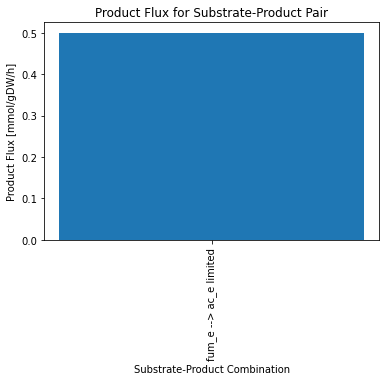

In [8]:
create_bar_chart(all_reactions, product_lim)

## Databases
<hr>

### Exercise: 

Have a look into the listed Databases to find pathway from substrate to product and associated reactions. 
Chose one Database that seems to work best for your combination and look at the reactions to chose one you would like to test in the Experiment.

Put in the Metabolite ID of your substrate or product in 'None'. \
The Output gives you the database ID for your substrate and product.

$\color{darkblue}{\text{TIPPS:}}$\
Every database-link leads you to a map where metabolites, enzymes and reactions are displayed. By guiding the cursor over, for example, a metabolite more information such as the meabolite ID is shown. Often the reaction is displayed as number, except for the Escher-map.
Sometimes the database-ID is not the right ID for this model, use the two cells below to get the right ID for the model.\
$\color{darkblue}\text{KEGG:}$ Copy the link for the TCA-Cycle or Clycolysis and just add the KEGG_ID into the search bar by adding +"KEGG_ID" without any spaces after the link. This will highlight the metabolite associated to the KEGG_ID and makes the serach for substrate and product more efficient.\
$\color{darkblue}\text{BiGG/Escher:}$ Under 'View' and then 'Find', you can also search for individual metabolites and display them by entering the metabolite ID or name.\
$\color{darkblue}\text{ChatGPT:}$ Give precise commands and provide the AI with all information you gathered to this point. It will help achieving your goal more time efficient and keep in mind that there is no map or visualization like in the other databases. 

**Input:**

- Metabolite ID for substrate or product

Replace 'None' with the correct input.

In [9]:
# get KEGG ID for substrate 
print(model.metabolites.get_by_id('pyr_e').annotation['kegg.compound'])
# get KEGG ID for product
print(model.metabolites.get_by_id('succ_e').annotation['kegg.compound'])

# get BiGG ID for substrate
print(model.metabolites.get_by_id('pyr_e').annotation['bigg.metabolite'])
# get BiGG ID for product
print(model.metabolites.get_by_id('succ_e').annotation['bigg.metabolite'])

# get EcoCyc ID for substrate
print(model.metabolites.get_by_id('pyr_e').annotation['biocyc'])
# get EcoCyc ID for product
print(model.metabolites.get_by_id('succ_e').annotation['biocyc'])

# https://www.genome.jp/pathway/map00020 +KEGG_ID # KEGG TCA-cycle
# https://www.genome.jp/pathway/map00010 +KEGG_ID # KEGG Glycolysis
# https://escher.github.io/#/app?map=e_coli_core.Core%20metabolism&tool=Builder&model=e_coli_core # BiGG/Escher
# https://biocyc.org/pathway?orgid=ECOLI&id=TCA&detail-level=2 # EcoCyc TCA-cycle
# https://biocyc.org/pathway?orgid=ECOLI&id=GLYCOLYSIS&detail-level=2 # EcoCyc Glycolysis
# https://chatgpt.com # ChatGPT

C00022
C00042
pyr
succ
META:PYRUVATE
META:SUC


The next two Code-cells might help to find the reaction ID you're looking for. By searching the metabolite and the reactions this metabolite participates in, you get information about the reaction ID, reaction name and the reaction itself. Consider Capital letters for the first letter.\
Have a close look at your metabolite-pair and especially the pathway and consider different component of the metabolism.

**Input:**
- first None: the metabolite name or any short form to find the metabolite ID
- second None: metabolite ID you extracted from previous cell to get information about the reaction

In [10]:
search_met = 'Acet'
model.metabolites.query(search_met, 'name')

[<Metabolite ac_c at 0x7f97e2fdbe20>,
 <Metabolite ac_e at 0x7f97e2fdbf70>,
 <Metabolite acald_c at 0x7f97e2fdbfa0>,
 <Metabolite acald_e at 0x7f97e2fdb700>,
 <Metabolite accoa_c at 0x7f97e2fdb820>,
 <Metabolite actp_c at 0x7f97e2fdb760>]

In [11]:
met_reactions = 'acald_c'
# list comprehension to show all reactions that contain the metabolite
[[reaction.id, reaction.name, reaction.reaction] for reaction in model.metabolites.get_by_id(met_reactions).reactions]

[['ACALD',
  'Acetaldehyde dehydrogenase (acetylating)',
  'acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c'],
 ['ACALDt', 'Acetaldehyde reversible transport', 'acald_e <=> acald_c'],
 ['ALCD2x',
  'Alcohol dehydrogenase (ethanol)',
  'etoh_c + nad_c <=> acald_c + h_c + nadh_c']]

## Experiment
<hr>

**Input:** 
- any reaction ID of your choice. Consider using the code-cells above to find right reaction ID for this model.

Repalce 'None' with the correct input.

In [14]:
# reaction ID of choice 
target_reaction = 'ACt2r'

# add reaction ID to list of all reactions
all_reactions.append(target_reaction)
print(all_reactions)

# optimize the model with reaction ID
model = optimize_reaction(model, target_reaction)
product_lim.append(round(model.slim_optimize(),2) / product)

['fum_e --> ac_e limited', 'ACt2r', 'ACt2r']


Here you can extend the bar chart to show the reaction ID you put in above and the product flux associated to that reaction. Compare the old product flux with the newly generated and decide if your chosen reaction ID is correct.\
If the reaction ID is correct try to extend the product flux even more, you may even be able to reach the old production rate.

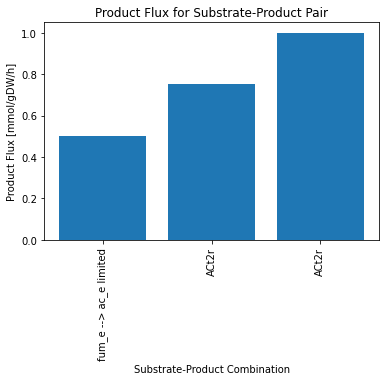

In [15]:
# check if reaction ID is correct and model is optimized
create_bar_chart(all_reactions, product_lim)